# Mahla Entezari 

## Second Assignment
# Theoretical Exercises

### Exercise 1
##### What are exploding and vanishing gradients in neural networks?
##### How can Adam Optimizer help us with them? Is LeakyReLU better or ReLU in avoiding vanishing gradients?

Exploding gradients are a problem where large error gradients accumulate and result in very large updates to neural network model weights during training.
The explosion occurs through exponential growth by repeatedly multiplying gradients through the network layers that have values larger than 1.0 .

Exploding gradients may be addressed by redesigning the network to have fewer layers.

Certain activation functions, like the sigmoid function, squishes a large input space into a small input space between 0 and 1. Therefore, a large change in the input of the sigmoid function will cause a small change in the output. Hence, the derivative becomes small.

The simplest solution is to use other activation functions, such as ReLU, which doesn’t cause a small derivative.
Residual networks are another solution, as they provide residual connections straight to earlier layers.
Batch normalization layers can also resolve the issue.

The Adam optimizer is designed to address the issues of exploding and vanishing gradients 
Adam adapts the learning rate for each parameter during training based on the estimates of first and second moments of the gradients. This adaptive learning rate mechanism helps prevent the gradients from becoming too large (exploding) or too small (vanishing) by scaling them appropriately.
Adam normalizes the adaptive learning rates by the square root of the second moment estimate, which helps stabilize the optimization process and prevents large oscillations in the parameter updates, thereby reducing the likelihood of exploding gradients.

ReLU is defined as f(x) = max(x,0) and LeakyReLU is defined as f(x) = max(alpha*x, x) .
alpha is a small positive constant.(typically around 0.01
LeakyReLU is better because It ensures that the gradient is never completely zero for negative inputs.

### Exercise 2
##### How can we avoid overfitting? Name 9 methods and explain them in detail.

* Cross-validation: for assess the performance of a model and to select the best hyperparameters.
Splitting the dataset into multiple subsets,training the model on some of the subsets, and evaluating it on the remaining subsets.This process is repeated multiple times with different combinations, and the average performance is computed.
* Train-validation-test split: Splitting the dataset into three subsets: training, validation, and test sets.
Training set for train the model, validation set to tune hyperparameters and monitor the model's performance during training, test set to evaluate the final performance of the trained model
* Early stopping: Stopping the training process when the performance starts to degrade during training.Halt the training process before it starts to memorize noise and irrelevant patterns.
* Regularization: Prevent overfitting by penalizing large parameter values. L1 regularization adds a penalty term proportional to the absolute value of the parameters to the loss function, and L2 regularization adds a penalty term proportional to the square of the parameters.
* Drop-out: Randomly dropp a fraction of the nodes in the network during training.
* Data augmentation: Artificially increase the size of training dataset by applying transformations such as rotation, translation, scaling, and flipping to the existing data samples.It helps the model learn more robust and invariant features.
* Ensemble learning: Training multiple models independently and combining their predictions to make a final prediction. 
* Feature selection: Select a subset of the most relevant features from the dataset and discarding irrelevant or redundant features to reduce the complexity of the model.
* Model Complexity Reduction: Reducing the number of parameters, layers, or nodes.

### Exercise 3
##### Does dropout slow down training?
##### Does it slow down inference (i.e., making predictionson new instances)?
##### What about MC dropout?

Yes. Because doing some computational overhead during training but doesn't effect the inference phase.
MC add computational complexity during inference due to multiple forward passes , it requires running the network multiple times with dropout enabled and averaging the predictions.So MC Dropout can increase the computational cost of inference compared to a single forward pass, but it does not significantly impact the speed of inference compared to other techniques for uncertainty estimation.

### Exercise 4
##### Compare and contrast L1 regularization and L2 regularization. How do they differ in terms of their effects on model weights?
##### Explore the concept of elastic net regularization and its advantages over L1 and L2 regularization. In what scenarios would elastic net regularization be preferred? (first, describe them in detail and then compare them together with plots and their equations)

L1: adds a penalty term to the loss function proportional to the absolute values of the model weights, computed as the sum of the absolute values of the weights.
It tends to drive many weights to exactly zero.\
L2: adds a penalty term to the loss function proportional to the square of the model weights, computed as sum of the squares of the weights.
Encourages smaller but non-zero weights and tends to distribute the weight values more evenly across all features.\
Elastic Net: add L1 and L2; sum of absolute and squared to make balance.\
It has better performance when have highly correlated features and datasets with a large number of features. \
when feature selectioning.


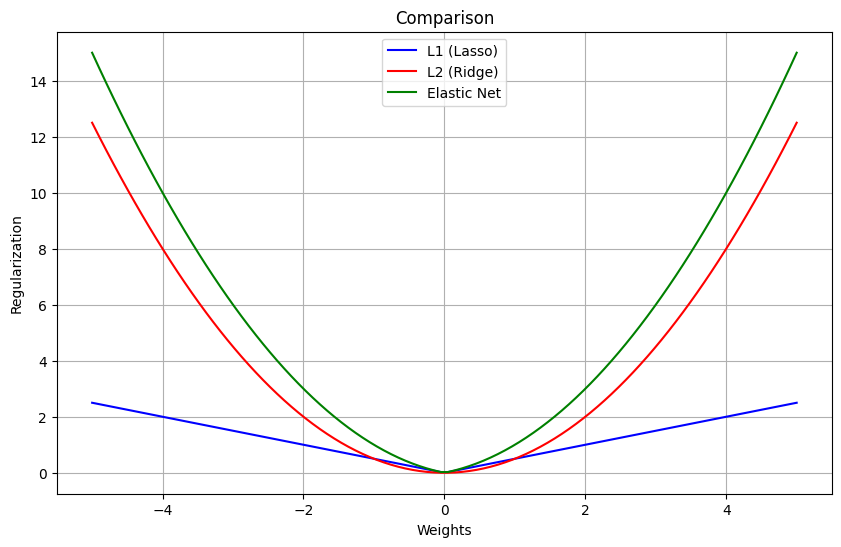

In [1]:
import numpy as np
import matplotlib.pyplot as plt

weights = np.linspace(-5, 5, 100)
lambda_ = 0.5

l1 = lambda_ * np.abs(weights)
l2 = lambda_ * weights**2
elastic = lambda_ * np.abs(weights) + lambda_ * weights**2

plt.figure(figsize=(10, 6))
plt.plot(weights, l1, label='L1 (Lasso)', color='blue')
plt.plot(weights, l2, label='L2 (Ridge)', color='red')
plt.plot(weights, elastic, label='Elastic Net', color='green')
plt.xlabel('Weights')
plt.ylabel('Regularization')
plt.title('Comparison')
plt.legend()
plt.grid(True)
plt.show()


### Exercise 5
##### Explain the concept of batch normalization and its role in improving the training of deep neural networks.

Normalize the inputs of each layer during training. Reducing internal covariate shift, batch normalization stabilizes for training process, enabling faster convergence and allowing the use of higher learning rates, acts as a form of regularization by introducing noise during training for prevent overfitting, Reducing gradient variance and improving the flow of gradients during backpropagation.

### Exercise 6
##### Discuss the benefits of ensemble methods in improving the robustness and accuracy of MLP models

Ensembles mitigate overfitting by combining multiple models, reducing the impact of outliers or errors in individual data points, combine weak learners to create strong learners.\
So Ensembles enhance the robustness, accuracy, and reliability of MLP models 

### Exercise 7
##### Investigate the use of uncertainty estimation techniques, such as Monte Carlo dropout or Bayesian neural networks, for quantifying model uncertainty and improving decision-making in MLPs

Using uncertainty estimation techniques like Monte Carlo dropout or Bayesian neural networks enhances decision making in MLPs by providing probabilistic predictions and quantifying prediction uncertainty. These methods help capture model uncertainty, aiding in robust decision-making by acknowledging the limitations of the model's predictions. Implementing such techniques enables MLPs to make more informed decisions, particularly in domains where uncertainty plays a crucial role.

### Exercise 8
##### Discuss the limitations of traditional performance metrics such as accuracy and propose alternative evaluation metrics for assessing model performance in imbalanced datasets or noisy environments.

Traditional metrics like accuracy fail to capture performance nuances in imbalanced datasets or noisy environments due to bias towards majority classes or inability to handle misclassifications properly. Metrics like precision, recall or cost-sensitive measures offer more nuanced evaluations by considering class distribution, false positives, false negatives, and misclassification costs, providing a clearer picture of model efficacy.

### Exercise 9
##### Analyze the convergence properties of stochastic optimization algorithms such as stochastic gradient descent (SGD) and Adam.
##### Discuss conditions under which these algorithms converge and potential challenges in practice

Stochastic optimization algorithms like SGD and Adam converge under conditions of convexity and appropriate hyperparameter settings. Challenges include noisy gradients, hyperparameter sensitivity, and convergence to suboptimal local optima in non-convex landscapes. Practical success hinges on careful hyperparameter tuning and regularization strategies.

### Exercise 10
##### Explore the challenges associated with non-convex optimization in training deep neural networks.
##### Discuss issues such as saddle points, poor local minima, and plateaus, and strategies to overcome them.


Non-convex optimization in deep neural networks encounters issues such as saddle points, poor local minima, and plateaus, impeding convergence. Overcoming these challenges involves careful initialization, advanced optimization algorithms, and regularization techniques to facilitate efficient navigation of the complex optimization landscape.\
Mitigation strategies include careful initialization, advanced optimization algorithms like Adam, and regularization methods such as dropout to facilitate smoother optimization paths and avoid getting stuck in suboptimal regions.

### Exercise 11
##### Discuss second-order optimization methods such as Newton's method and theQuasi-Newton method.
##### Explain how these methods differ from first-order methods like gradient descent and their advantages in terms of convergence speed and robustness.

Second-order optimization methods like Newton's method and Quasi-Newton methods incorporate curvature information, converging faster than first-order methods like gradient descent. Newton's method directly computes and utilizes the Hessian matrix, offering rapid convergence but at high computational cost and memory requirements. Quasi-Newton methods approximate the Hessian matrix iteratively, making them more computationally feasible for large-scale problems. These methods are robust to ill-conditioned landscapes but sensitive to noise and may struggle in non-convex optimization. Despite challenges, they offer significant advantages in convergence speed and robustness, particularly in optimization problems where computational resources are not a constraint.

# Practical Exercise

In [2]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset

In [3]:
data = pd.read_csv('student_data.csv')

In [4]:
def standard_scaling(X, num_features):
    for feature in num_features:
        X[feature] = (X[feature] - X[feature].mean()) / X[feature].std()
    return X    
        

In [5]:
X = data.drop('G3', axis=1)
y = data['G3']
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns
# missing values 
X[num_features] = X[num_features].fillna(X[num_features].mean())
X[cat_features] = X[cat_features].fillna(X[cat_features].mode().iloc[0])

X = pd.get_dummies(X, columns=cat_features)

X = standard_scaling(X, num_features)
print(X.head())

        age      Medu      Fedu  traveltime  studytime  failures    famrel  \
0  1.021751  1.142407  1.358648    0.791247  -0.042232 -0.449374  0.062115   
1  0.238078 -1.597982 -1.398197   -0.642435  -0.042232 -0.449374  1.177367   
2 -1.329268 -1.597982 -1.398197   -0.642435  -0.042232  3.584777  0.062115   
3 -1.329268  1.142407 -0.479249   -0.642435   1.149321 -0.449374 -1.053136   
4 -0.545595  0.228944  0.439699   -0.642435  -0.042232 -0.449374  0.062115   

   freetime     goout      Dalc  ...  activities_no  activities_yes  \
0 -0.235711  0.800464 -0.540014  ...           True           False   
1 -0.235711 -0.097784 -0.540014  ...           True           False   
2 -0.235711 -0.996032  0.582646  ...           True           False   
3 -1.236851 -0.996032 -0.540014  ...          False            True   
4 -0.235711 -0.996032 -0.540014  ...           True           False   

   nursery_no  nursery_yes  higher_no  higher_yes  internet_no  internet_yes  \
0       False         Tr

In [6]:
def split_data(X, y, ratio, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    test_size = int(len(X) * ratio)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]

    X_train , X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train , y_test = y.iloc[train_indices], y.iloc[test_indices]

    return X_train, X_test, y_train, y_test
    


In [7]:
X_train , X_test , y_train , y_test =  split_data(X, y, ratio=0.2)
print("Initial X shape:", X.shape)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Initial X shape: (395, 58)
Training set shape: (316, 58) (316,)
Testing set shape: (79, 58) (79,)


In [8]:
X_train_np = X_train.values.astype(np.float32)
X_test_np = X_test.values.astype(np.float32)
y_train_np = y_train.values.astype(np.float32)
y_test_np = y_test.values.astype(np.float32)

In [9]:
X_train = torch.tensor(X_train_np, dtype=torch.float32)
X_test = torch.tensor(X_test_np, dtype=torch.float32)
y_train = torch.tensor(y_train_np, dtype=torch.float32).reshape(-1, 1)
y_test = torch.tensor(y_test_np, dtype=torch.float32).reshape(-1, 1)

In [10]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(MLP, self).__init__()
        layers = []
        # self.in_to_hid = nn.Linear(input_size, hidden_size)
        # self.hid_to_hid = nn.Linear(hidden_size, hidden_size)
        # self.hid_to_out = nn.Linear(hidden_size, output_size)
        # layers.append(in_to_hid)
        # layers.append(nn.ReLU())5
        _in = input_size
        for hidden_size in hidden_layers:
            _out = hidden_size
            layers.append(nn.Linear(_in,_out))
            layers.append(nn.ReLU())
            _in = _out
         
        layers.append(nn.Linear(_in,output_size))
        layers.append(nn.ReLU())   
        self.layers = nn.Sequential(*layers)
    def forward(self, X):
        return self.layers(X)
        
    

In [11]:
input_size = X_train.shape[1]
hidden_layers = []
for i in range (10): #20 layers
    hidden_layers.append(64)
    hidden_layers.append(32)
output_size = 1
learning_rate = 0.001
num_epochs = 100
batch_size = 64
dropout_prob = 0.2

In [12]:
model = MLP(input_size, hidden_layers, output_size)

In [13]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [14]:
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [15]:
def MSE_Loss(y_pred, y_target):
    return torch.mean((y_target-y_pred)**2)
    
def MAE_Loss(y_pred, y_target):
    return torch.mean(np.abs(y_target - y_pred))

def R_squared_Loss(y_pred, y_target):
    a = ((y_target - y_pred)**2).sum()
    b = ((y_target - torch.mean(y_target))**2).sum()
    return 1 - (a / b)

In [16]:
losses = []
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = MSE_Loss(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * inputs.size(0)
    losses.append(total_loss/ len(train_loader.dataset))
    epoch_loss = total_loss / len(train_loader.dataset)
    print(epoch+1, ": ", round(epoch_loss, 8))


1 :  125.97374851
2 :  124.99279862
3 :  124.05850963
4 :  123.05704044
5 :  121.778143
6 :  119.74103198
7 :  115.35277953
8 :  102.49597236
9 :  53.14683267
10 :  26.13951905
11 :  25.60473505
12 :  16.40727184
13 :  16.42087217
14 :  13.56867057
15 :  11.2485857
16 :  10.03585946
17 :  9.01809471
18 :  7.77820189
19 :  6.61533708
20 :  5.81489858
21 :  5.19863216
22 :  4.77444602
23 :  4.44549623
24 :  4.16322886
25 :  3.91250645
26 :  3.66534326
27 :  3.43541411
28 :  3.20206695
29 :  3.07784659
30 :  2.81829899
31 :  2.66555347
32 :  2.42543874
33 :  2.19889383
34 :  1.94407707
35 :  1.7755734
36 :  1.61830389
37 :  1.45778938
38 :  1.31495242
39 :  1.19066139
40 :  1.09500478
41 :  1.060774
42 :  0.93326712
43 :  0.88555145
44 :  0.79635032
45 :  0.74620304
46 :  0.70056819
47 :  0.64014523
48 :  0.6144423
49 :  0.56296046
50 :  0.52657271
51 :  0.77165238
52 :  0.92973344
53 :  1.01816159
54 :  0.76883153
55 :  1.1621217
56 :  0.83327893
57 :  0.67419057
58 :  0.6457596
59 :  0.

Text(0.5, 0, 'epoch')

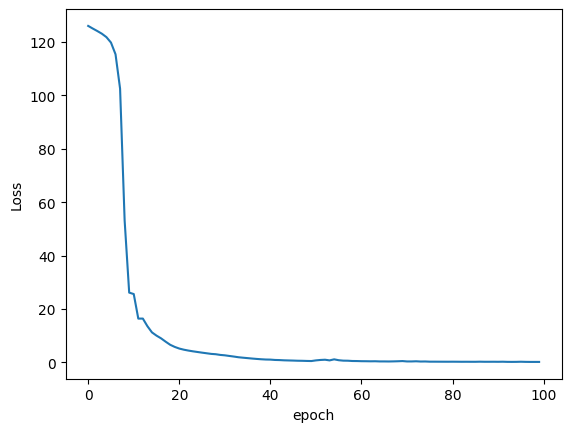

In [17]:
plt.plot(range(num_epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [18]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    
MSE = MSE_Loss(y_pred, y_test)
MAE = MAE_Loss(y_pred, y_test)
R_squared = R_squared_Loss(y_pred, y_test)

print('Mean Squared Error (MSE):', MSE)
print('Mean Absolute Error (MAE):', MAE)
print('R-squared:', R_squared)

Mean Squared Error (MSE): tensor(7.8698)
Mean Absolute Error (MAE): tensor(1.7464)
R-squared: tensor(0.6162)


In [19]:
linear_layer_weights = model.layers[0].weight.data.numpy() 
feature_importance = np.abs(linear_layer_weights).mean(axis=0) 
sorted_indices = np.argsort(feature_importance)
feature_names = X.columns.tolist()
top_features = [feature_names[i] for i in sorted_indices[:10]] 
print("Top Features Influencing Student Performance:\n", top_features)


Top Features Influencing Student Performance:
 ['famsup_yes', 'school_MS', 'romantic_no', 'sex_F', 'Pstatus_A', 'reason_reputation', 'Pstatus_T', 'internet_yes', 'reason_course', 'failures']


# Report 


In this exercise, after downloading the data from the Kaggle site, I loaded it using pandas and removed the last column, G3, as it represented the students' final score, which is the performance metric to be evaluated and predicted. However, I had some doubts regarding whether G1 and G2 should also be considered as outputs.

Then, I proceeded to preprocess the data by replacing missing values: numerical data with their averages, and categorical data with the category that appeared most frequently. Additionally, I separated numerical data from non-numerical data and applied one-hot encoding to the non-numerical data to facilitate processing as numerical data.

Subsequently, I standardized the data. Next, I split the data into two groups for training and testing, using a ratio of 1 to 4 to assess the model's efficiency.

The `mlp` class outlines the general structure of a multilayer perceptron (MLP), consisting of layers. In the forward pass, the input is propagated through these layers to produce an output.

After setting the values and determining the sizes and dimensions, I trained the model using the `train` function. I calculated and printed the loss value at each step to monitor changes in performance.

Finally, by inspecting the `eval` function, I prepared the model for testing with real test data and evaluated its error rate using three different loss functions.

In conclusion, I identified the 10 most important features in students' performance based on the average weight of each feature in the layers. Features with higher weights had a greater impact on the result.
